# PROYECTO 2: Procesamiento de imágenes y modelos de Regresión con Python
### AUTORES: Almazan Alejandro y Monleón Lucrecia

# Primera parte:

Suponer que estamos creando una App para editar y compartir fotos en diferentes redes
sociales:
1. Escribir una función que reciba como parámetros dos strings, uno contendrá la ruta
para acceder a una imagen (Drive o URL), y el otro una palabra clave, que podrá ser
“Youtube, Instagram, Twitter o Facebook”. La función debe leer/abrir la foto y
redimensionar la imagen al tamaño adecuado especificado como parámetro para
cada una de las palabras clave (busque las dimensiones recomendadas de cada
aplicación).
Nota: Tenga en cuenta la escala, no queremos que la foto se distorsione.

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
!pip install pillow  #Intalación de la biblioteca

In [4]:
from PIL import Image

In [5]:
ruta = '/content/drive/MyDrive/Tecnicatura Tecnologia de Programación/Segundo Cuatrimestre/Python Avanzada/Proyecto 2/'
# ruta de la carpeta de archivos

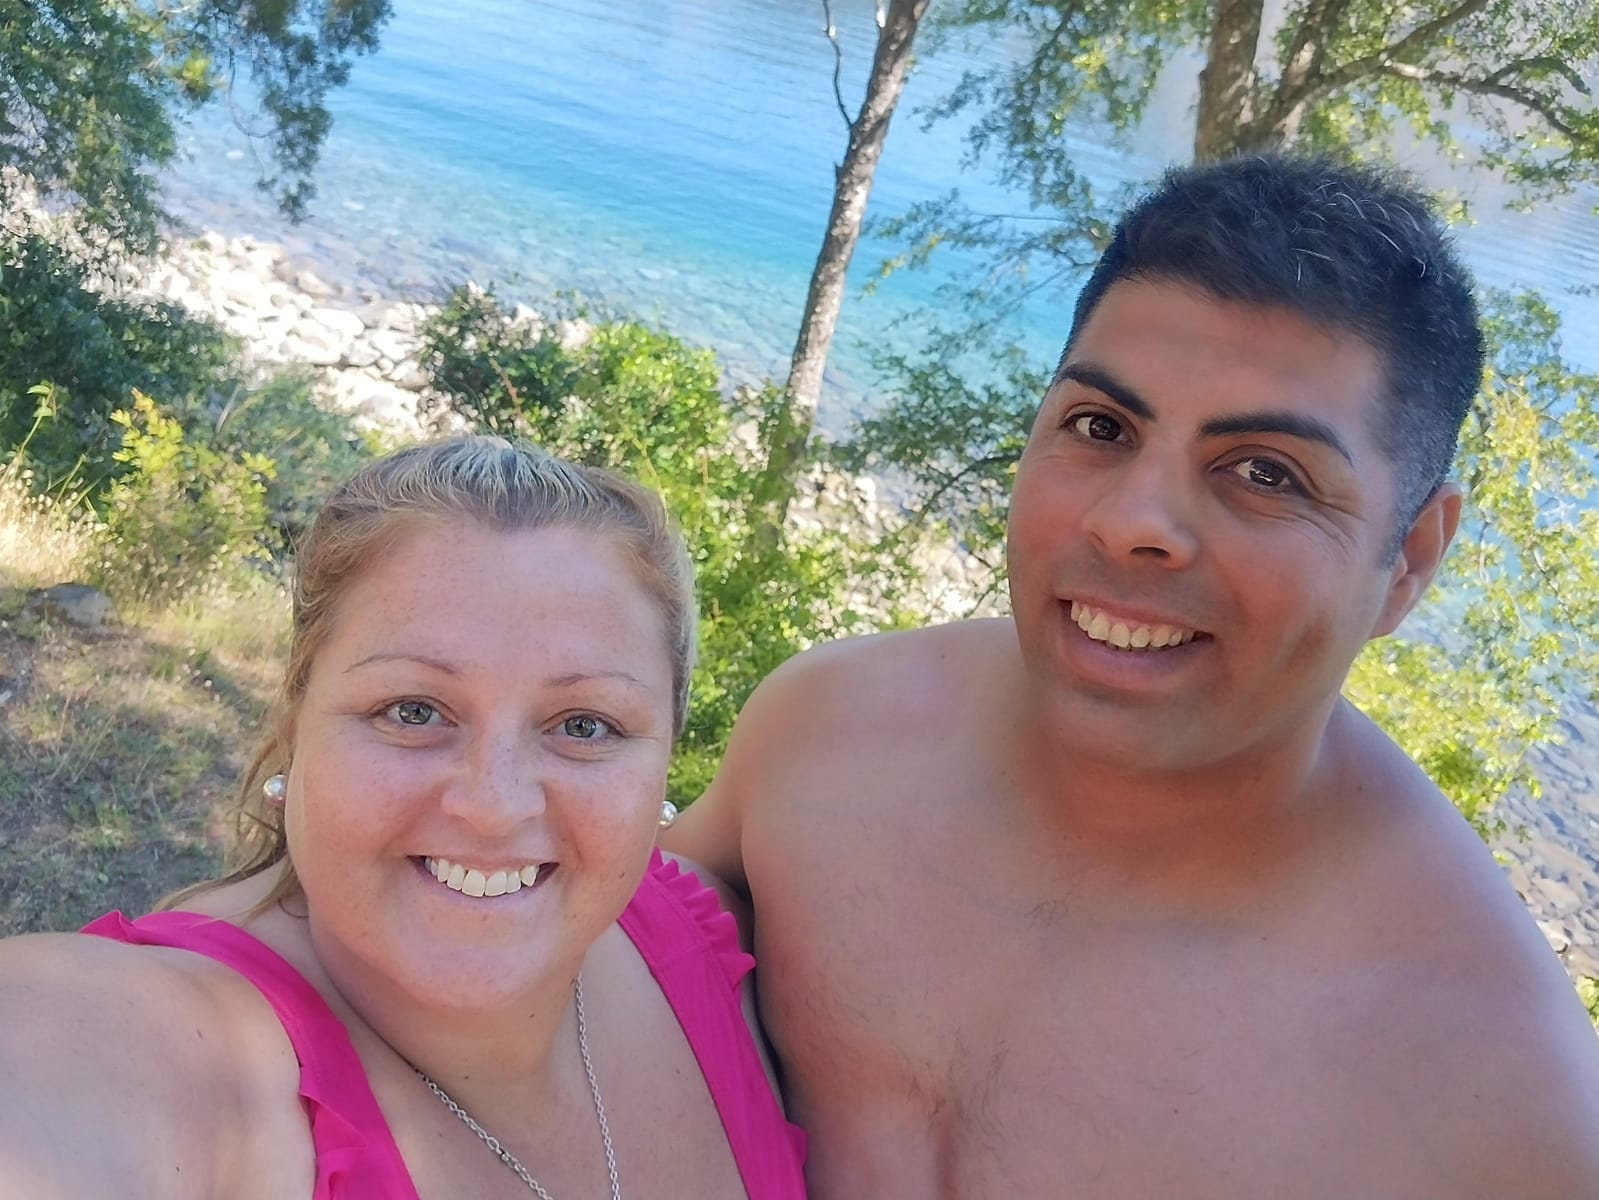

In [6]:
img = Image.open(ruta+'playabonita.jpeg') #Abrir la imagen elegida y mostrarla en tamaño original
img

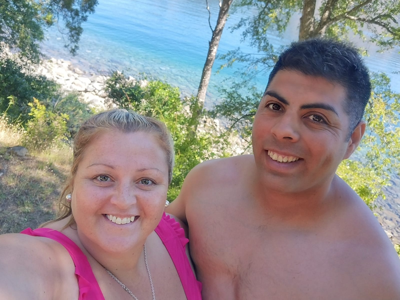

In [ ]:
img.resize((400,300)) #Cambiar de tamaño

In [14]:
def buscar_imagen(nombre_imagen: str) -> Image.Image:
    # Abre una imagen desde la ruta especificada.
    return Image.open(ruta + nombre_imagen)

def Redimensionar(nombre_imagen: str, plataforma: str) -> Image.Image:
    # Redimensiona la imagen según las dimensiones recomendadas.
    img = Image.open(ruta + nombre_imagen)

    match plataforma:  # Dimensiones recomendadas
      case 'Youtube':
        img_yt = img.resize((1280,720))
        return img_yt
      case 'Instagram':
        img_ig = img.resize((1080,1080))
        return img_ig
      case 'Twitter':
        img_tw = img.resize((1200,675))
        return img_tw
      case 'Facebook':
        img_fb = img.resize((1200,630))
        return img_fb
      case default:
        return img


2. Crear una función que ajuste el contraste de la foto utilizando su histograma.
Probarla con una foto oscura y con otra con exceso de luz. Mostrar la foto original y
la ecualizada en una misma figura y guardarla en ambos casos (Adjuntar las figuras
a la solución del proyecto).

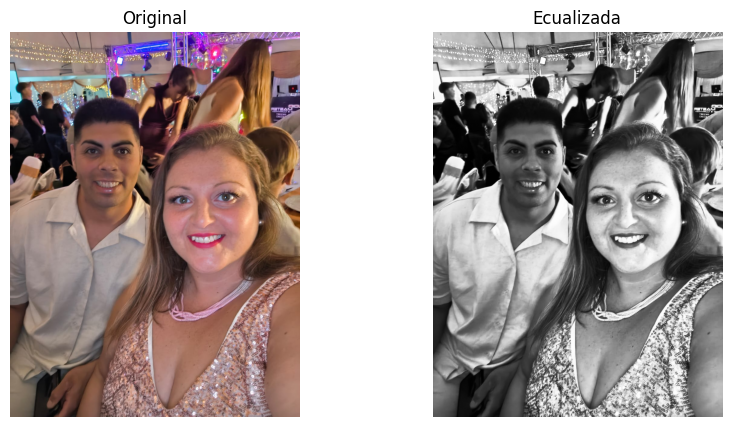

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image   # Importar PIL para trabajar con Imagenes

def contraste(ruta_o_imagen):
  # Verificar si el parámetro recibido es una ruta (string) o un objeto Imagen.
  if isinstance(ruta_o_imagen, str):
    # Si es una ruta, la abre y la convierte a 'L' = escala de grises.
    imagen = Image.open(ruta_o_imagen).convert("L")
  else:
    # Si ya esta cargada, solo lo convierte a 'L'.
    imagen = ruta_o_imagen.convert("L")

  # Convierte el objeto Image de PIL a un array NumPy.
  img_array = np.array(imagen)

  # Calcula el histograma de la imagen aplanada (flattened).
  # bins=256= hay 256 niveles posibles de gris.
  # El guión bajo sirve para descartar los bordes de los bins, que no se necesitan.
  # np.histogram cuenta cuántos píxeles hay de cada intensidad.
  histograma, _ = np.histogram(img_array.flatten(), bins=256, range=(0,256))

  # Calcula la Función de Distribución Acumulada (CDF).
  # cumsum() indica cuántos píxeles hay hasta cada nivel de gris.
  cdf = histograma.cumsum()
  # Normaliza la CDF para que sus valores finales mapeen al rango 0-255.
    # Se divide cada valor de la CDF por el valor máximo (cdf[-1], que es el total de píxeles)
    # y se multiplica por 255. Esto crea nuestra función de mapeo para la ecualización.
  cdf_normalizada = cdf * 255 / cdf[-1]

  # Reemplazamos los valores de intensidad de la imagen original usando la CDF normalizada.
    # np.interp (interpola)= mapea cada valor de píxel de 0 a 255
    # a su nuevo valor correspondiente definido por la CDF normalizada.
  img_ecualizada = np.interp(img_array.flatten(), range(256), cdf_normalizada)

  # Convierte el array NumPy ecualizado de nuevo a un objeto Image de PIL.
    # Devuelve el tamaño original de la imagen.
    # Asegura que los datos sean de tipo 'uint8' (entero sin signo de 8 bits),
    # que es el formato estándar para imágenes en escala de grises (0-255).
  img_ecualizada = Image.fromarray(img_ecualizada.reshape(img_array.shape).astype("uint8"))

  return img_ecualizada


# Carga la imagen desde Google Drive
imagen = Image.open("/content/drive/MyDrive/Tecnicatura Tecnologia de Programación/Segundo Cuatrimestre/Python Avanzada/Proyecto 2/casamiento.jpeg")

# Llamar a la función para ecualizar el contraste.
resultado = contraste(imagen)

# visualización
# Muestra el objeto Image resultante con matplotlib
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(imagen, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(resultado, cmap="gray")
plt.title("Ecualizada")
plt.axis("off")

plt.show()

3. Programar una función que aplique los 9 filtros de Pillow de la siguiente tabla. La
función debe incluir en sus parámetros el nombre del filtro que el usuario quiere usar.
Mostrar y guardar la foto resultante. Además, mostrar la foto original y las 9
resultantes si se aplicaran todos los filtros en una misma figura y guardarla en
ambos casos.
Nota: Ponerle como título a cada foto el nombre del filtro, e indicar al usuario cuál fue
el filtro que eligió (por ejemplo con el color del título diferente).

In [20]:
from PIL import ImageFilter

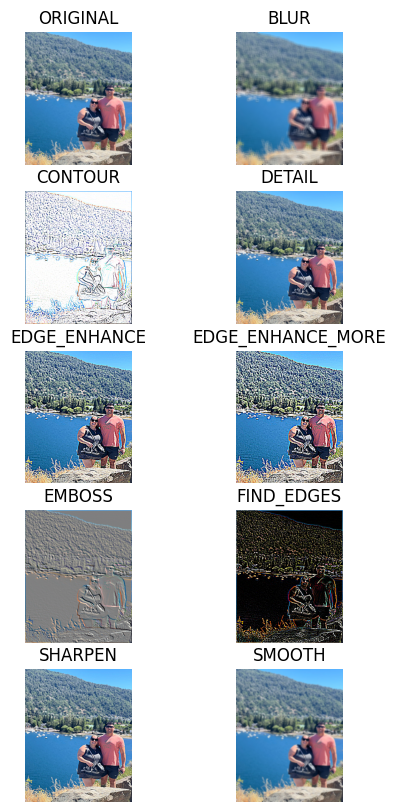

In [27]:
img_nuestra = Image.open(ruta+'miradorsmandes.jpeg')
img_nuestra= img_nuestra.resize((200,250))

fig, axes = plt.subplots(5, 2, figsize=(5, 10))
ax = axes.ravel()

titulos = ('ORIGINAL', 'BLUR', 'CONTOUR', 'DETAIL', 'EDGE_ENHANCE', 'EDGE_ENHANCE_MORE',
                    'EMBOSS', 'FIND_EDGES', 'SHARPEN', 'SMOOTH')

filtros = (None, ImageFilter.BLUR, ImageFilter.CONTOUR,
                           ImageFilter.DETAIL, ImageFilter.EDGE_ENHANCE, ImageFilter.EDGE_ENHANCE_MORE,
                           ImageFilter.EMBOSS, ImageFilter.FIND_EDGES, ImageFilter.SHARPEN,
                           ImageFilter.SMOOTH)

for indice, titulo, filtro in zip(range(len(titulos)), titulos, filtros):
  if filtro is not None:
    ax[indice].imshow(img_nuestra.filter(filtro))
  else:
    ax[indice].imshow(img_nuestra)
  ax[indice].set_title(titulo)
  ax[indice].set_axis_off()

plt.show()

4. Caso hipotético: Se llevó a cabo un análisis de usuarios que demostró que el 35%
de los posibles futuros usuarios son pintores que compartirían fotos de sus trabajos
allí, por lo cual les pedimos que diseñen una funcionalidad en Python para asistirlos.
El objetivo es que cuando el algoritmo identifica con IA que la foto leída es de una
persona (suponga que hay otra función que ya ha hecho este paso previo con una
variable persona=True), ayude a los usuarios a dibujar el boceto de la persona de la
foto. Prueben su función con una foto de un personaje de su elección.
resultado puede ser una imagen binarizada como la del ejemplo (con fondo blanco o
negro), o una imagen que realce mucho los bordes... Usen su creatividad y
justifiquen el resultado de la función demostrando que sería la mejor herramienta
para los usuarios pintores/dibujantes comparando diferentes resultados.

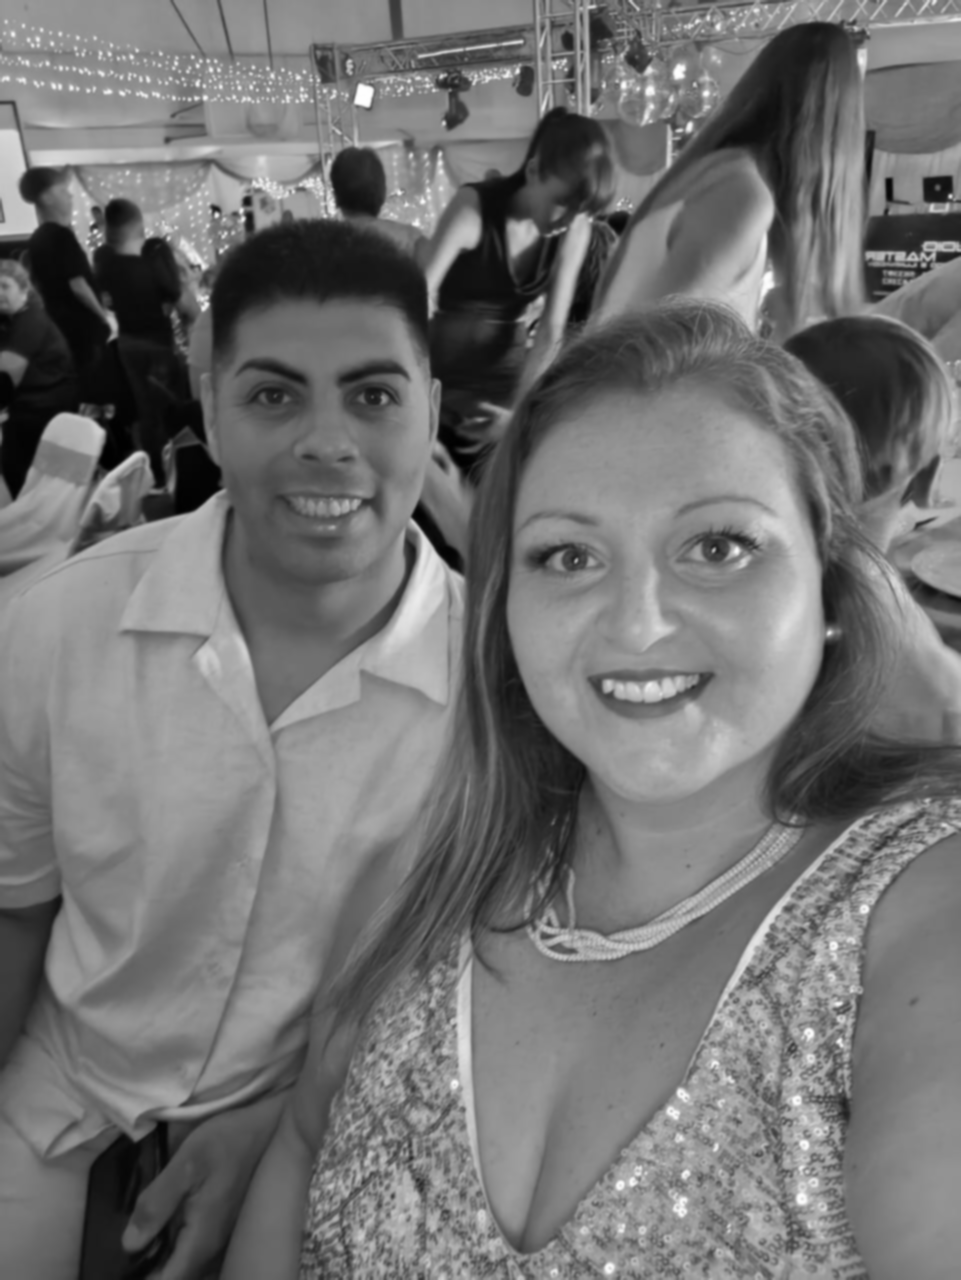

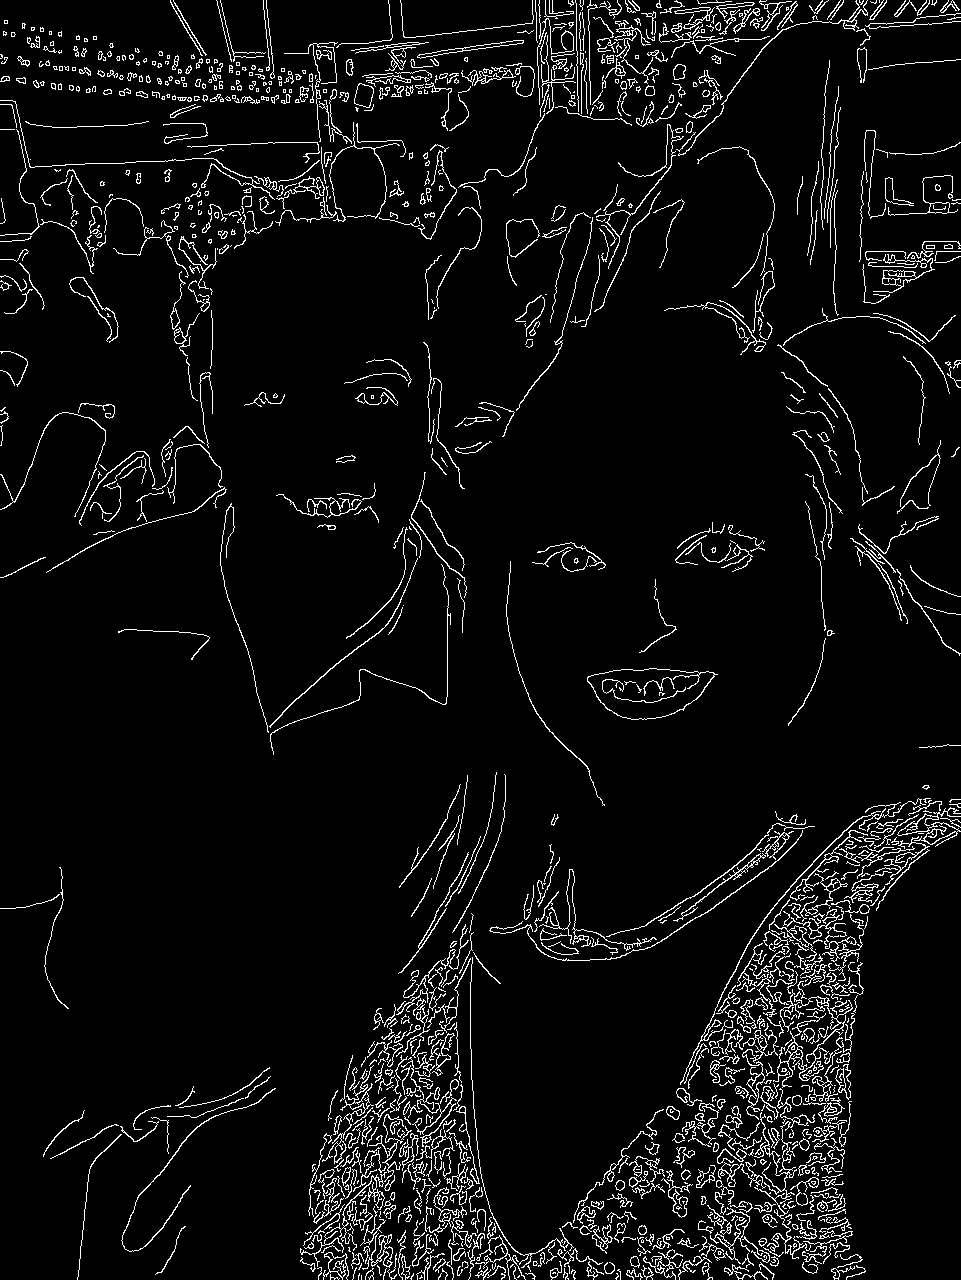

In [29]:
import cv2
from google.colab.patches import cv2_imshow  # Para colab


# Cargar imagen
img = cv2.imread(ruta + 'casamiento.jpeg')

# Convertir a escala de grises
img_en_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar desenfoque gaussiano para reducir ruido
img_dif = cv2.GaussianBlur(img_en_gris, (5,5), 0)

# Mostrar imagen difuminada
cv2_imshow(img_dif)

# Detectar bordes con Canny (umbrales ajustados)
img_bordes = cv2.Canny(img_dif, 50, 150)

# Mostrar bordes detectados
cv2_imshow(img_bordes)

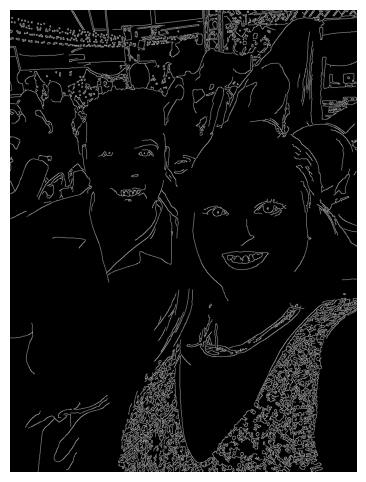

In [32]:
plt.figure(figsize=(6,6))   # Para verla mas chica
plt.imshow(img_bordes, cmap="gray")
plt.axis("off")
plt.show()

5. Crear un menú de opciones que le permita al usuario hacer todas las operaciones,
tener en cuenta que para todas las opciones es necesario pasar primero por la
función 1, por lo cual, asistan al usuario para que no se salte la lectura de las
imágenes y usen excepciones en sus funciones para validarlo.

In [1]:
# Variable global para almacenar la imagen cargada
imagen_cargada = None

# Función 1: Leer imagen
def leer_imagen(ruta: str):
    global imagen_cargada
    try:
        imagen_cargada = cv2.imread(ruta)
        if imagen_cargada is None:
            raise FileNotFoundError("No se pudo abrir la imagen. Verifique la ruta.")
        print("Imagen cargada correctamente.")
    except Exception as e:
        print(f"Error al cargar la imagen: {e}")

# Función 2: Mostrar imagen original
def mostrar_original():
    if imagen_cargada is None:
        raise Exception("Primero debe cargar una imagen (opción 1).")
    cv2.imshow("Imagen Original", imagen_cargada)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Función 3: Ecualizar contraste (histograma)
def ecualizar_contraste():
    if imagen_cargada is None:
        raise Exception("Primero debe cargar una imagen (opción 1).")
    img_gris = cv2.cvtColor(imagen_cargada, cv2.COLOR_BGR2GRAY)
    img_eq = cv2.equalizeHist(img_gris)

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img_gris, cmap="gray")
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(img_eq, cmap="gray")
    plt.title("Ecualizada")
    plt.axis("off")

    plt.show()

# Función 4: Desenfoque Gaussiano
def desenfoque():
    if imagen_cargada is None:
        raise Exception("Primero debe cargar una imagen (opción 1).")
    img_gris = cv2.cvtColor(imagen_cargada, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gris, (5,5), 0)
    cv2.imshow("Imagen Difuminada", img_blur)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Función 5: Detección de bordes (Canny)
def detectar_bordes():
    if imagen_cargada is None:
        raise Exception("Primero debe cargar una imagen (opción 1).")
    img_gris = cv2.cvtColor(imagen_cargada, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gris, (5,5), 0)
    bordes = cv2.Canny(img_blur, 50, 150)
    cv2.imshow("Bordes Detectados", bordes)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Menú principal
def menu():
    while True:
        print("\n MENÚ DE OPCIONES")
        print("1. Cargar imagen")
        print("2. Mostrar imagen original")
        print("3. Ecualizar contraste (histograma)")
        print("4. Aplicar desenfoque gaussiano")
        print("5. Detectar bordes (Canny)")
        print("6. Salir")

        opcion = input("Seleccione una opción: ")

        try:
            if opcion == "1":
                ruta = input("Ingrese la ruta de la imagen: ")
                leer_imagen(ruta)
            elif opcion == "2":
                mostrar_original()
            elif opcion == "3":
                ecualizar_contraste()
            elif opcion == "4":
                desenfoque()
            elif opcion == "5":
                detectar_bordes()
            elif opcion == "6":
                print("Saliendo del programa...")
                break
            else:
                print("Opción inválida. Intente nuevamente.")
        except Exception as ex:
            print(f"Error: {ex}")

# Ejecutar menú
menu()


 MENÚ DE OPCIONES
1. Cargar imagen
2. Mostrar imagen original
3. Ecualizar contraste (histograma)
4. Aplicar desenfoque gaussiano
5. Detectar bordes (Canny)
6. Salir
Seleccione una opción: 6
Saliendo del programa...


6. Crear un módulo que contenga todas las funciones y guardarlo como fotoapp.py, y
prueben las funciones en un notebook fotoapp_testdev.ipynb

7. Finalmente, subir ambos archivos y las imágenes (las de prueba y las generadas) a
un repositorio de Github y agregar el link al archivo que suba al moodle del proyecto.
En el README incluir un diagrama de flujo del menú.
Nota: Use diferentes fotos para probar cada función.

# Segunda parte:

Entrenar un modelo de Regresión Lineal Múltiple utilizando los features obtenidas de algún
dataset a elección, evaluar su desempeño y analizar la capacidad de predicción del modelo.
Links con datasets: https://www.kaggle.com/datasets / https://datos.gob.ar/dataset
Sugerimos buscar un dataset que contenga al menos 3 variables numéricas como features
(X) y una variable numérica a predecir (Y). Solo en caso de que se complique mucho la
elección del dataset, usar alguno de estos dos: precio_casas.csv / heart_disease.csv (no
suma puntos de la elección del dataset en la nota)

### Para el modelo de Regresión Lineal Múltiple, en un notebook seguir los siguientes pasos:

In [4]:
#IMPORTAR BIBLIOTECAS NECESARIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

1. Carga de Datos y visualización de variables

In [5]:
# Carga del data set con su ruta
# Leemos el csv con pandas por eso pd
df = pd.read_csv("/content/drive/MyDrive/Tecnicatura Tecnologia de Programación/Segundo Cuatrimestre/Python Avanzada/Proyecto 2/Proyecto 2/Global_Climate_2020_2025.csv")
df.sample(5)

Year      Continent       Country  Avg_Temperature(°C)  \
165   2025  South America     Argentina                 26.0   
829   2021        Oceania     Australia                 19.7   
1022  2020  South America         Chile                 20.0   
408   2023        Oceania     Australia                 17.6   
7     2021         Africa  South Africa                 15.3   

      CO2_Emissions(Mt)  Sea_Level_Rise(mm)  Climate_Risk_Index  
165              337.80                1.12                  25  
829              561.29                2.32                  53  
1022             612.28                4.60                  57  
408              365.60                4.76                  84  
7                359.76                2.80                  55

2. Cambio de estructura de datos a matricial

In [6]:
# Las vamos a pasar a array
X = df[['Year', 'CO2_Emissions(Mt)', 'Sea_Level_Rise(mm)', 'Climate_Risk_Index']].values
y = df['Avg_Temperature(°C)'].values



In [7]:
type(y) # Confirmamos el tipo de y

numpy.ndarray

3. Particionado de datos en Entrenamiento y Test

In [8]:
# vamos a llamar a la función train_test_split() y dividimos los datos en entrenamiento y test.
# Para este ejemplo vamos a tomar un 20% de datos de test y un 80% de datos de entrenamiento.
np.random.seed(2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


4. Generación del modelo con los datos de Entrenamiento

In [9]:
# Importar la clase LinearRegression
from sklearn.linear_model import LinearRegression

# Crear el objeto del modelo
reg_mul = LinearRegression()

# Entrenar el modelo con tus datos
reg_mul.fit(X_train, y_train)

# Predecir valores
y_pred = reg_mul.predict(X_test)

reg_mul.fit(X, y)

LinearRegression()

5. Evaluación del modelo con los datos de Entrenamiento

In [10]:
# Obtenemos las predicciones del modelo con los datos de entrenamiento
y_predict = reg_mul.predict(X_train)

# Calculamos los errores
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_predict)
mse_train = mean_squared_error(y_true=y_train, y_pred=y_predict)

print("Error Absoluto Medio (MAE): {error}".format(error=mae_train))
print("Error Cuadrático Medio (MSE): {error}".format(error=mse_train))

Error Absoluto Medio (MAE): 6.093619287358379
Error Cuadrático Medio (MSE): 49.978829930956046


6. Evaluación del modelo con los datos de Test

In [11]:
# Obtenemos las predicciones del modelo con los datos de test
y_predict = reg_mul.predict(X_test)

# Calculamos los errores
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_predict)
mse_test = mean_squared_error(y_true=y_test, y_pred=y_predict)

print("Error Absoluto Medio (MAE): {error}".format(error=mae_test))
print("Error Cuadrático Medio (MSE): {error}".format(error=mse_test))

Error Absoluto Medio (MAE): 6.535360398206285
Error Cuadrático Medio (MSE): 56.014756499977814


Redactar las conclusiones respondiendo:
- Cuál fue el desempeño del modelo?
- Qué variable fue la más influyente según los coeficientes del modelo?
- Las features extraídas del dataset fueron buenas predictoras? o sugieren otras?
- Comparativa de resultados de evaluación del modelo con los datos de
Entrenamiento y de Test.
Subir el notebook a un repositorio de Github y agregue el link al archivo que suba al moodle
del proyecto. En el README incluir las conclusiones redactadas.